# Universe Machine mass functions

* SMF of the new UM when considering in-situ, ex-situ, and the sum of both compared to Songs SMF
* look at the scatter in M* and Mhalo
- for in-situ
- for in-situ + ex-situ
- for N most massive galaxies

TODO:
* Give song latest data (with extra fields)
* Once things are restructured get this ready for PR
* Cleanup figures
    * Increase lable size
* From talking to alexie, we don't just want the SMF of centrals. We want the SMF of everything.
    * I think this means not eveyrthing summed in, but just count all the centrals+sats
    * This is also way wrong compared to HSC data. work out what is up there.
* Richness vs scatter at fixed halo mass. So pick a mass bin, then plot richness (number of galaxies with mass > 10.8 ish, bin this) vs scatter.
* https://docs.google.com/document/d/1kRZUw_nHksmnfgu_u6OtERTrl_w-xgio5t7WndmFQPA/edit
* https://redwoodforest.slack.com/archives/D6UA26L6R/p1515102490000636
* Invert sm-hm scatter - instead of showing scatter at fixed halo mass, do it for fixed stellar mass.
* Don't plot scatter of sm/hm ratio. Plot it of SM (because we are already at fixed hm)
    * Actually I am not sure. This seems like it will introduce error because of bin width?
    * Maybe I should always be plotting the ratio
* half_mass_scale_a is probbaly for the dark matter - get the equivalent for the galaxy

# Install and load data

In [154]:
%matplotlib inline
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.io.fits

import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Local libs
import sys
sys.path.append("..")

import plots
import cluster_sum
import lib.stellar_mass_function as smf
from importlib import reload # for when I mess up local libs

In [2]:
datadir = os.getenv("dataDir") + "/universe_machine/"
catalog_file = "sfr_catalog_insitu_exsitu_0.712400_final_extended.npz"

catalog = np.load(datadir + catalog_file)
centrals = catalog["centrals"]
satellites = catalog["satellites"]

# Our data

Let's get a very broad sense of our data

In [4]:
print(centrals.dtype)
print(len(centrals))
print(len(satellites))
print(satellites[:10])
print(centrals[centrals['id'] == 8272347969])

[('id', '<i8'), ('upid', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('m', '<f8'), ('mp', '<f8'), ('sm', '<f8'), ('icl', '<f8'), ('sfr', '<f8'), ('mvir', '<f8'), ('rvir', '<f8'), ('rs', '<f8'), ('Halfmass_Scale', '<f8'), ('scale_of_last_MM', '<f8'), ('M200b', '<f8'), ('M200c', '<f8'), ('Acc_Rate_Inst', '<f8'), ('Acc_Rate_100Myr', '<f8'), ('Acc_Rate_1*Tdyn', '<f8'), ('Acc_Rate_2*Tdyn', '<f8'), ('Acc_Rate_Mpeak', '<f8'), ('Vmax@Mpeak', '<f8')]
385125
10809469
[ (8272347655, 8272347654,  13.83487,  18.749399,  16.14661 ,   1.98400000e+09,   3.11700000e+09,   2.31400000e+05,   0.00000000e+00,   6.41000000e-05,   1.34880000e+09,  25.014   ,  1.248,  0.281 ,  0.281 ,   1.34880000e+09,   1.34880000e+09,  0.    ,  0.     , -0.1056,  -0.1456,  0.    ,   30.41)
 (8272348262, 8272347732,  15.026  ,  17.7521  ,  17.388531,   1.98400000e+09,   2.26700000e+09,   1.15200000e+03,   0.00000000e+00,   2.51000000e-06,   1.34880000e+09,  25.014   ,  2.777,  0.6884,  0.6884,   1.34880000e+09,   1.252

385117 centrals without ICL of our 385125 samples


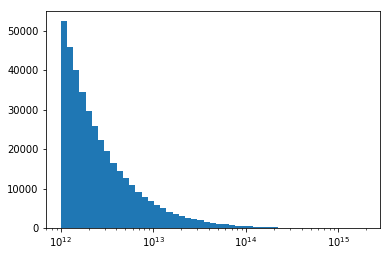

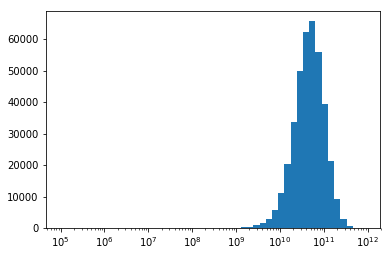

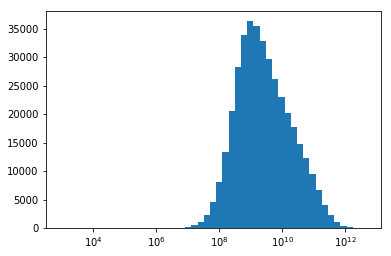

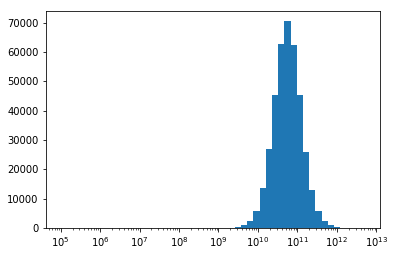

In [5]:
fig, ax = plt.subplots()
_ = ax.hist(centrals["mp"], bins = np.geomspace(np.amin(centrals["mp"]), np.amax(centrals["mp"]), 50))
_ = ax.set(xscale="log")

fig, ax = plt.subplots()
_ = ax.hist(centrals["sm"], bins = np.geomspace(np.amin(centrals["sm"]), np.amax(centrals["sm"]), 50))
_ = ax.set(xscale="log")

fcentrals = centrals[np.nonzero(centrals["icl"])[0]]
fig, ax = plt.subplots()
_ = ax.hist(fcentrals["icl"], bins = np.geomspace(np.amin(fcentrals["icl"]), np.amax(fcentrals["icl"]), 50))
_ = ax.set(xscale="log")
print(
    "{} centrals without ICL of our {} samples".format(len(np.nonzero(centrals["icl"])[0]), len(centrals))
)

fig, ax = plt.subplots()
_ = ax.hist(
    centrals["icl"] + centrals["sm"],
    bins = np.geomspace(
        np.amin(centrals["icl"]) + np.amin(centrals["sm"]),
        np.amax(centrals["icl"]) + np.amax(centrals["sm"]),
        50))
_ = ax.set(xscale="log")

# SMHM relations

Now let's plot the SM, halo mass relations for centrals

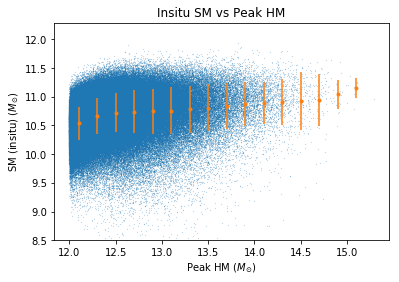

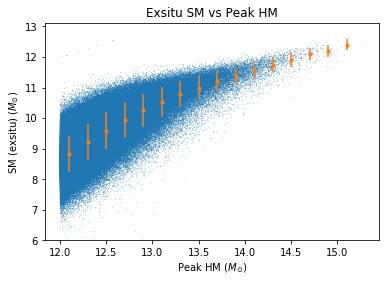

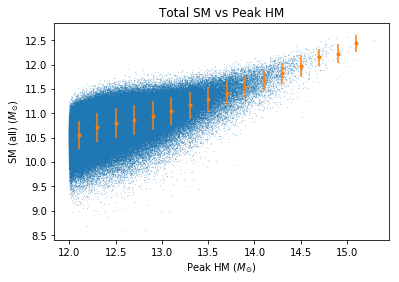

In [10]:
reload(plots)
ax = plots.dm_vs_insitu(centrals)
ax.set(ylim=8.5) # ignore crazy small galaxies

ax = plots.dm_vs_exsitu(centrals)
ax.set(ylim=6) # not sure why by default it ignores a bunch of data

plots.dm_vs_all_sm(centrals)

# SMHM for cluster

What happens if we start to plot this relation for multiple members of the cluster?

In [3]:
reload(cluster_sum)
data = {
    0: centrals,
    1: cluster_sum.centrals_with_satellites(centrals, satellites, 1),
    2: cluster_sum.centrals_with_satellites(centrals, satellites, 2),
    5: cluster_sum.centrals_with_satellites(centrals, satellites, 5),
    9: cluster_sum.centrals_with_satellites(centrals, satellites, 9),
    "all": cluster_sum.centrals_with_satellites(centrals, satellites, 0.9999),
}

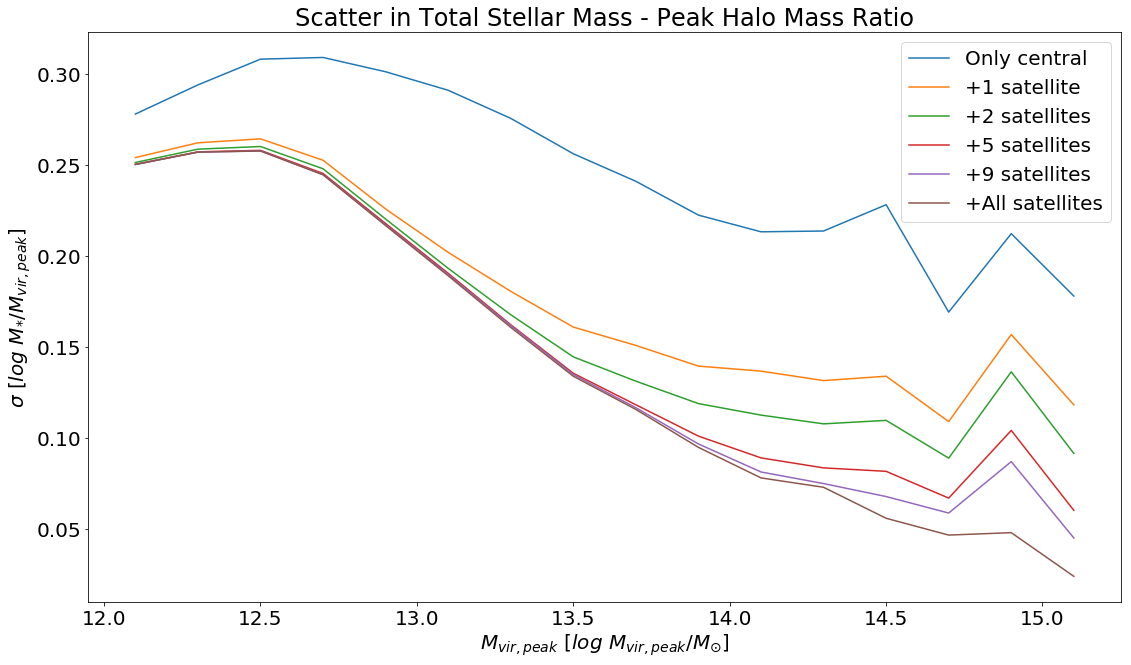

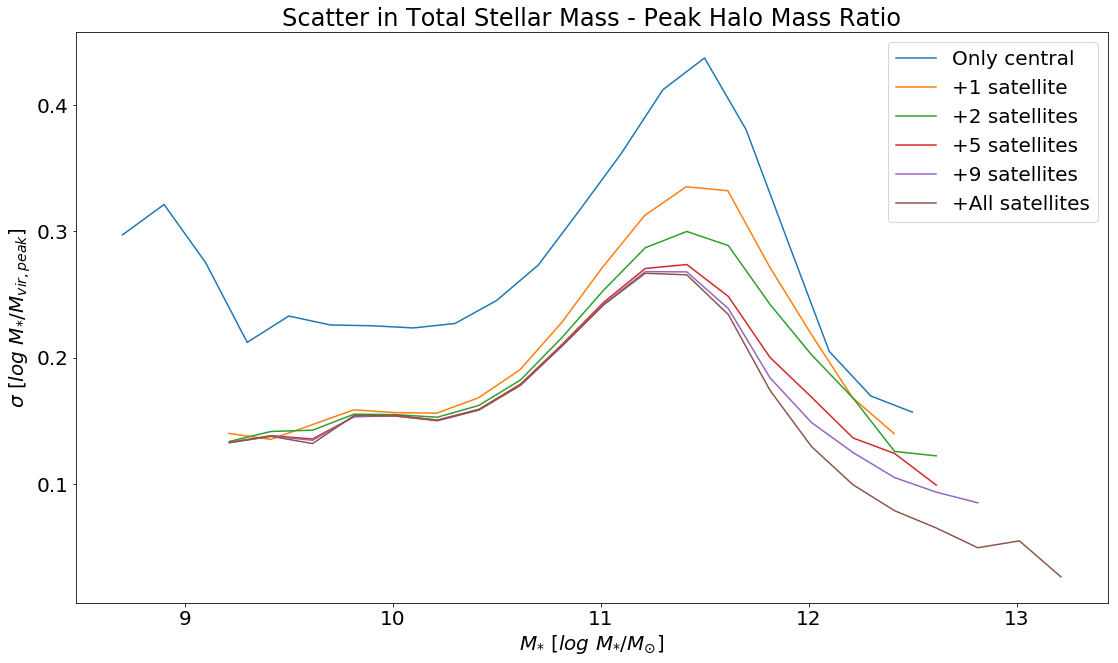

In [199]:
reload(plots)
matplotlib.rcParams.update({'font.size': 20})
plots.dm_vs_all_sm_error(
    [data[0], data[1], data[2], data[5], data[9], data["all"]],
    "hm",
    labels = ["Only central", "+1 satellite", "+2 satellites", "+5 satellites", "+9 satellites", "+All satellites"],
)
plots.dm_vs_all_sm_error(
    [data[0], data[1], data[2], data[5], data[9], data["all"]],
    "sm",
    labels = ["Only central", "+1 satellite", "+2 satellites", "+5 satellites", "+9 satellites", "+All satellites"],
)

# SMF

What does our SMF look like? (This is now right I think (see TODOs))

However, the output is badly wrong. 

In [66]:
hsc_smf_file_m10 = "/home/christopher/research/hsc_um2/data/s16a_massive_fastlane_logm10_smf_default.fits"
hsc_smf_file_m100 = "/home/christopher/research/hsc_um2/data/s16a_massive_fastlane_logm100_smf_default.fits"

m10_smf = astropy.io.fits.open(hsc_smf_file_m10)[1].data
m100_smf = astropy.io.fits.open(hsc_smf_file_m100)[1].data

In [67]:
print(m10_smf.dtype)
print(m10_smf)

(numpy.record, [('logm_mean', '>f8'), ('logm_0', '>f8'), ('logm_1', '>f8'), ('smf', '>f8'), ('smf_err', '>f8'), ('smf_low', '>f8'), ('smf_upp', '>f8')])
[ ( 10.45,  10.4,  10.5,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00)
 ( 10.55,  10.5,  10.6,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00)
 ( 10.65,  10.6,  10.7,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00)
 ( 10.75,  10.7,  10.8,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00)
 ( 10.85,  10.8,  10.9,   1.23958176e-07,   2.48352780e-08,  -2.47916352e-08,   2.72707987e-07)
 ( 10.95,  10.9,  11. ,   2.47916352e-07,   4.96449906e-08,   7.43749056e-08,   4.21457798e-07)
 ( 11.05,  11. ,  11.1,   4.95832704e-07,   9.92538264e-08,   1.48749811e-07,   8.42915597e-07)
 ( 11.15,  11.1,  11.2,   6.44582515e-06,   1.28947974e-06,   4.28895289e-06,   8.60269741e-06)
 ( 11.25,  11.2,  11.3,   3.94187000e-05,   7.88451825e-06,   2.95516291e-05, 

Dropped 0 galaxies with mass of 0


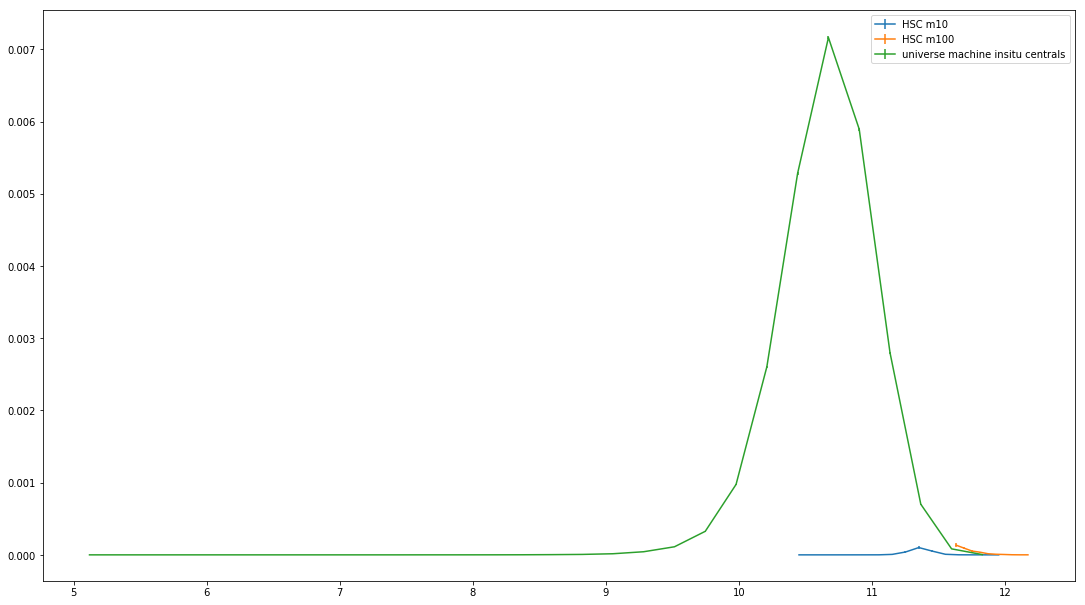

In [86]:
reload(smf)

def plot_sim_smf(stellar_masses, ax, label):

    nonzero_stellar_masses = np.log10(stellar_masses[stellar_masses != 0])
    print("Dropped {} galaxies with mass of 0".format(len(stellar_masses) - len(nonzero_stellar_masses)))

    sim_volume = 400**3 # https://redwoodforest.slack.com/archives/C5W6EQCAU/p1513187949000425 SMDPL
    num_bins = 30
    x, y, err = smf.compute_smf(
        nonzero_stellar_masses, sim_volume, num_bins, 
        np.min(nonzero_stellar_masses), np.max(nonzero_stellar_masses),
    )
    ax.errorbar(x, y, yerr = err, label=label)


fig, ax = plt.subplots()
ax.errorbar(m10_smf["logm_mean"], m10_smf["smf"], yerr = m10_smf["smf_err"], label="HSC m10")
ax.errorbar(m100_smf["logm_mean"], m100_smf["smf"], yerr = m100_smf["smf_err"], label="HSC m100")
plot_sim_smf(centrals["sm"], ax, "universe machine insitu centrals")
#plot_sim_smf(np.append(centrals["sm"] + centrals["icl"], satellites["sm"] + satellites["icl"]), ax, "all mass cents and sats")
#plot_sim_smf(centrals["sm"] + centrals["icl"], ax, "all mass cents")
ax.legend()
fig.set_size_inches(18.5, 10.5)

# Richness

What about richness? Does that have a relation with scatter at fixed halo mass

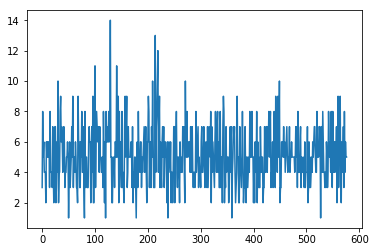

In [10]:
reload(cluster_sum)
minMassForRichness = 10**10.8
# I don't think this adds anything but am holding off on delting until I understand this properly again
binnedCentrals = centrals[(centrals["mp"] > pow(10, 14)) & (centrals["mp"] < pow(10, 14.1))]
richness = cluster_sum.get_richness(binnedCentrals, satellites, minMassForRichness)
plt.plot(richness)

/home/christopher/research/hsc_um2/cb/plots.py:143: RuntimeWarning:

divide by zero encountered in log10




At fixed halo mass, richer clusters tend to have slightly more SMHM variance. But this is weak...



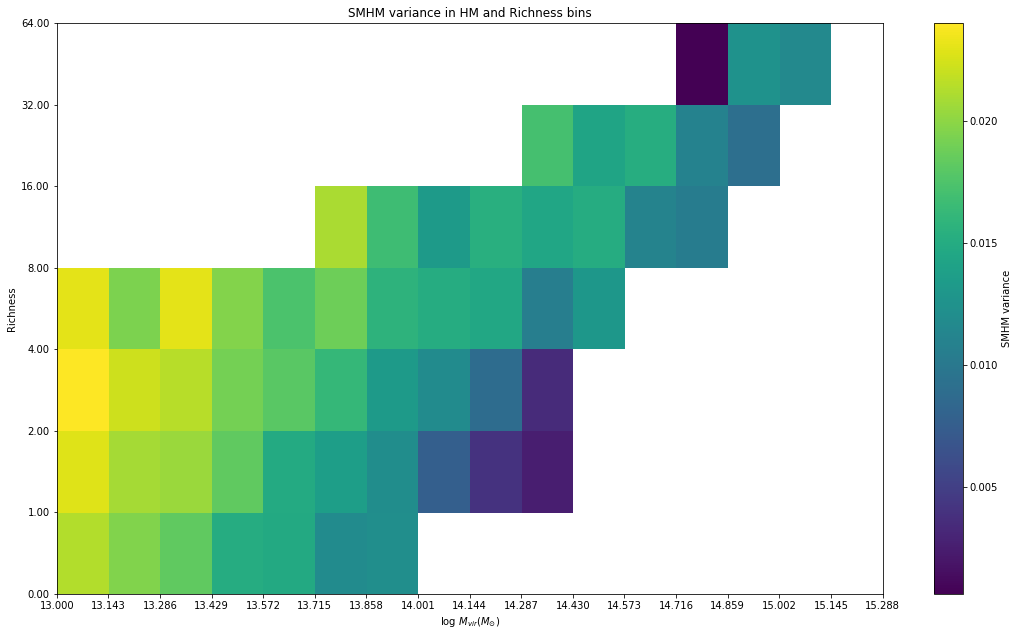

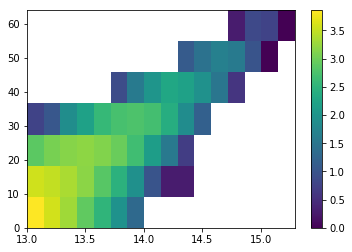

In [141]:
reload(plots)
# For each central halo
# Get the stellar mass, get sm/hm
# Get the richness
# plot!

plots.richness_vs_scatter(
    centrals[centrals["mp"] > 10**13], # We start here as at lower masses richness is always 0...
    satellites,
    minMassForRichness)
print("""
At fixed halo mass, richer clusters tend to have slightly more SMHM variance. But this is weak...
""")

# Concentration

Same as richness but for concentration

Just centrals
Total SM (including all sats)


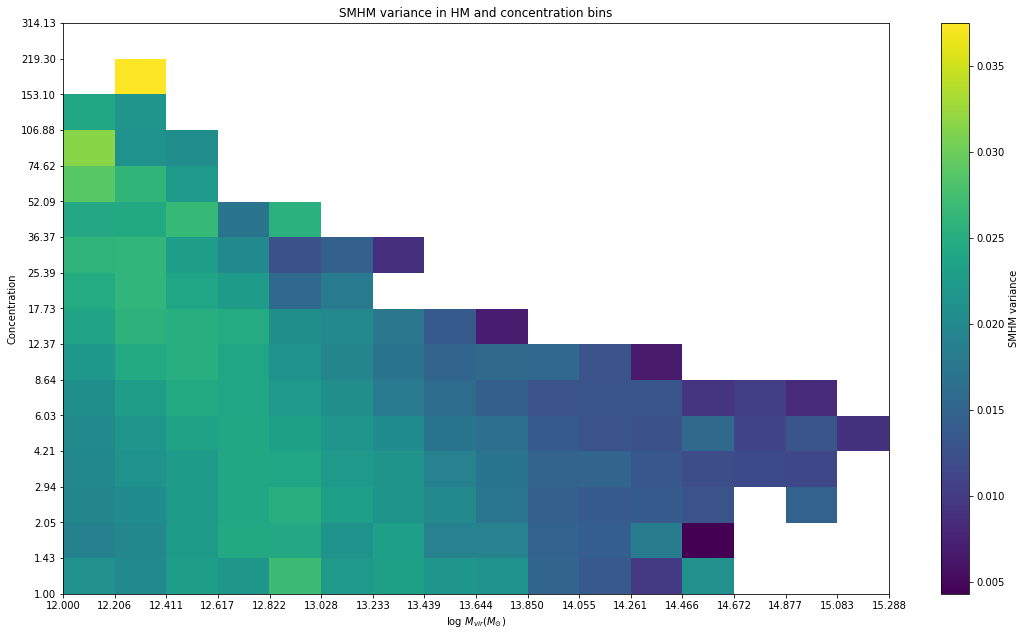

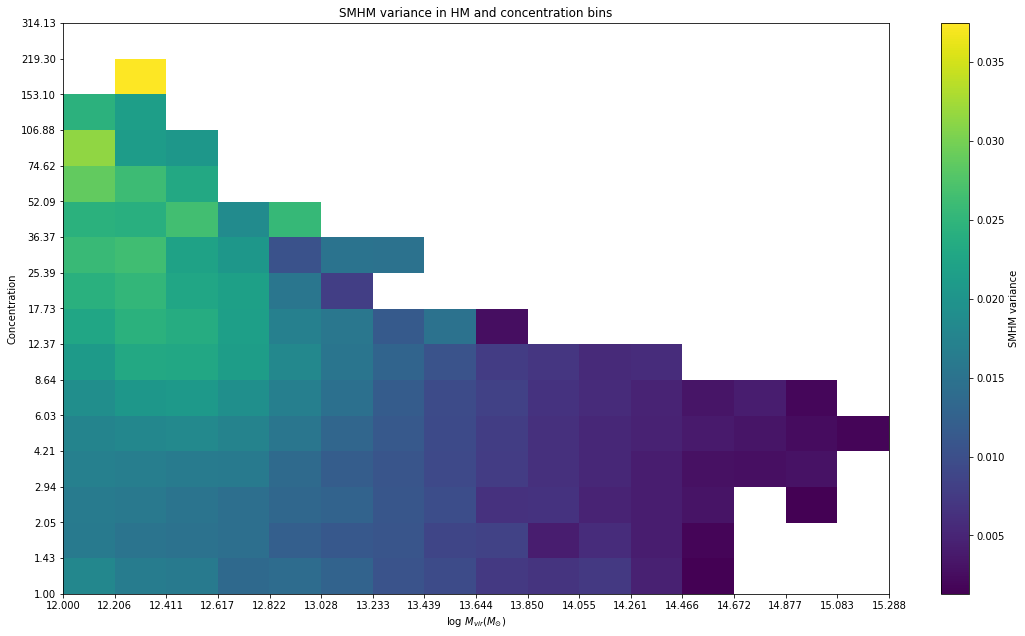

In [142]:
reload(plots)
print("Just centrals")
plots.concentration_vs_scatter(centrals)
print("Total SM (including all sats)")
plots.concentration_vs_scatter(data["all"])

# Age

What about age?

Just centrals
All galacies


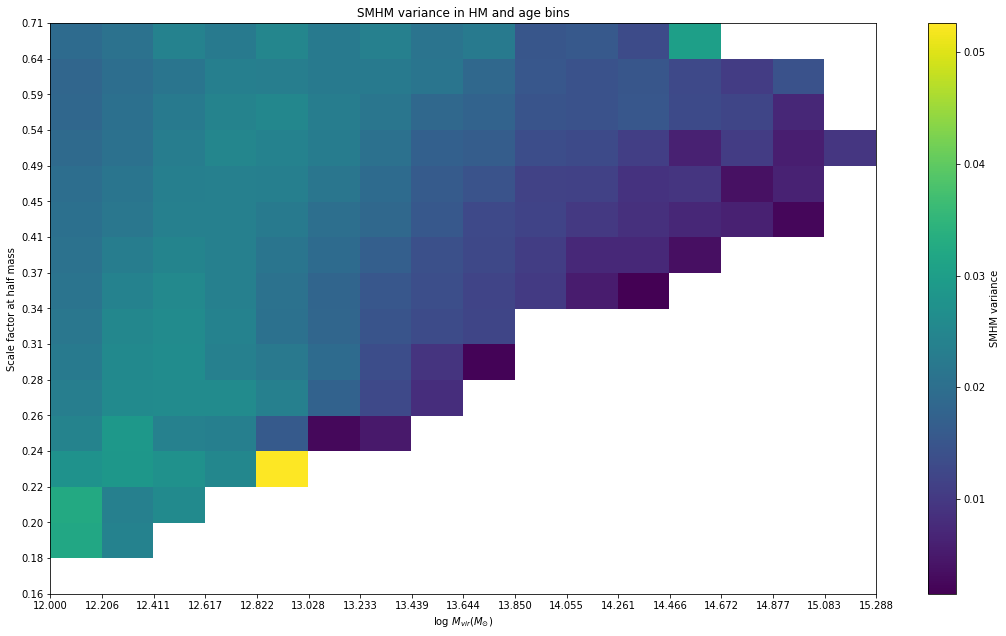

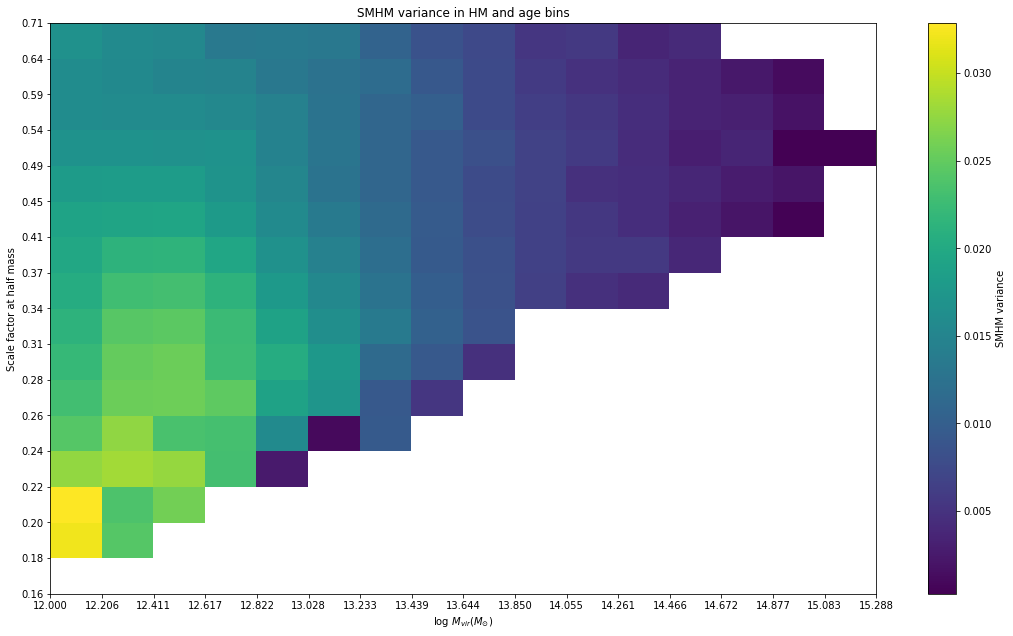

In [144]:
reload(plots)
print("Just centrals")
plots.age_vs_scatter(centrals)
print("All galacies")
plots.age_vs_scatter(data["all"])